In [1]:
import trait2d as tr
#import trait2d_minflux.minflux as mf
from trait2d.analysis.minflux import importPKL, openPKL
import pandas as pd
import trait2d.analysis.minflux as mf

###Ignore a warning which is only relevant for legacy files
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#display option for my mental health
pd.set_option('display.precision',12)

### The importPKL function works well with the old format, but not with the new, so it needs to be worked around a bit

In [2]:
old = importPKL(name = 'oldformat.pkl')

In [3]:
new = importPKL(name = 'newformat.pkl')

In [4]:
from trait2d.analysis.minflux import MFTrack

for i in range(len(old)):
    xx = mf.MFTrack.from_importPKL(old[i])

In [5]:
#masso = MFTrackDB.from_pkl('.','oldformat.pkl')

In [6]:
xx.get_x()

array([-2.32726616e-06, -2.33538389e-06, -2.31551050e-06, ...,
       -2.32602114e-06, -2.31655801e-06, -2.29943665e-06])

In [7]:
old[1]

{'track':                    x               y            t  tid                  frq  \
 5029 -0.000002775355  0.000004610381  7.098626400  0.0  140140.140140140138   
 5030 -0.000002782922  0.000004610746  7.098774850  0.0  220220.220220220217   
 5031 -0.000002774963  0.000004607577  7.098857125  0.0  220220.220220220217   
 5032 -0.000002780539  0.000004616699  7.098939400  0.0  210210.210210210207   
 5033 -0.000002770220  0.000004645660  7.099087825  0.0  190190.190190190187   
 ...              ...             ...          ...  ...                  ...   
 6358 -0.000002690608  0.000004621412  7.259604150  0.0  200200.200200200197   
 6359 -0.000002708997  0.000004607417  7.259686425  0.0  170170.170170170168   
 6360 -0.000002730839  0.000004606993  7.259834825  0.0  130130.130130130128   
 6361 -0.000002724075  0.000004602950  7.259983225  0.0  170170.170170170168   
 6362 -0.000002697611  0.000004606953  7.260131675  0.0  130130.130130130128   
 
              tint  
 5029  0

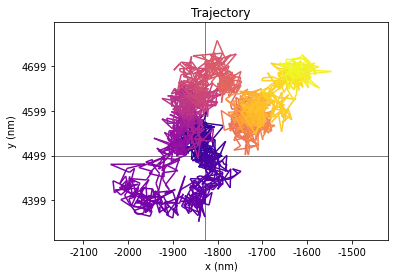

In [8]:
aaa = mf.MFTrack.from_importPKL(old[5])
aaa.plot_trajectory()

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap


fig, ax = plt.subplots(figsize = (7,7),frameon=False)
points = np.array([aaa._x,aaa._y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(aaa._t.min(),aaa._t.max(),100)
lc = LineCollection(segments, cmap='plasma',norm = norm)
line = ax.add_collection(lc)
lc.set_array(aaa._t)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cbar = fig.colorbar(line, cax=fig.add_axes([0.659, 0.22, 0.155, 0.01]), orientation = 'horizontal')
cbar.set_ticks([cbar.vmin + t*(cbar.vmax-cbar.vmin) for t in cbar.ax.get_yticks()])
cbar.set_ticklabels([t for t in cbar.ax.get_yticks()])

ax.set_xlim((aaa._x.min(),aaa._x.max()))
ax.set_ylim((aaa._y.min(),aaa._y.max()))
scalebar = mpatches.Rectangle((-1.7E-6,4.35E-6),0.1E-6,0.01E-6,facecolor='black')

ax.add_patch(scalebar)
ax.set_aspect(1.0)

In [9]:
aaa._t.max()-aaa._t.min()

0.2718573999999947

In [30]:
aaa.MF_calculate_msd(use_log = False)

100%|██████████| 660/660 [00:18<00:00, 35.33it/s]


In [26]:
from trait2d.analysis import ModelDB
from trait2d.analysis.models import ModelBrownian, ModelHop
ModelDB().cleanup()
ModelDB().add_model(ModelHop)
ModelDB().add_model(ModelBrownian)

In [12]:
import numpy as np

x = np.array([[1,19,5],[0,99,2],[5,7,18]])

idx2 = ((x>0) & (x<10))



In [13]:
x[idx2]

array([1, 5, 2, 5, 7])

In [18]:
aaa.MF_adc_analysis(weighting = 'error')

n_points =165
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164]


{'Dapp': array([3.21330089e-12, 1.52580306e-12, 1.05206256e-12, 9.07343085e-13,
        7.23028997e-13, 6.43805991e-13, 5.53853344e-13, 4.98322477e-13,
        4.52060369e-13, 3.94552320e-13, 3.68569405e-13, 3.51516187e-13,
        3.32190957e-13, 3.06959336e-13, 2.81410868e-13, 2.77789388e-13,
        2.65649964e-13, 2.62275224e-13, 2.32763545e-13, 2.40110148e-13,
        2.19460774e-13, 2.13315792e-13, 2.19629854e-13, 1.99182462e-13,
        2.04379264e-13, 1.93296881e-13, 1.93030107e-13, 1.88811456e-13,
        1.86058392e-13, 1.79696027e-13, 1.83579797e-13, 1.72811139e-13,
        1.72931885e-13, 1.71445863e-13, 1.63672816e-13, 1.67559029e-13,
        1.60413297e-13, 1.56992374e-13, 1.55708994e-13, 1.52569960e-13,
        1.49743728e-13, 1.52927001e-13, 1.47257442e-13, 1.49433881e-13,
        1.47010027e-13, 1.45174253e-13, 1.40768960e-13, 1.45680775e-13,
        1.36833516e-13, 1.35176876e-13, 1.33291258e-13, 1.35092525e-13,
        1.35155570e-13, 1.34023048e-13, 1.31997714e-13, 

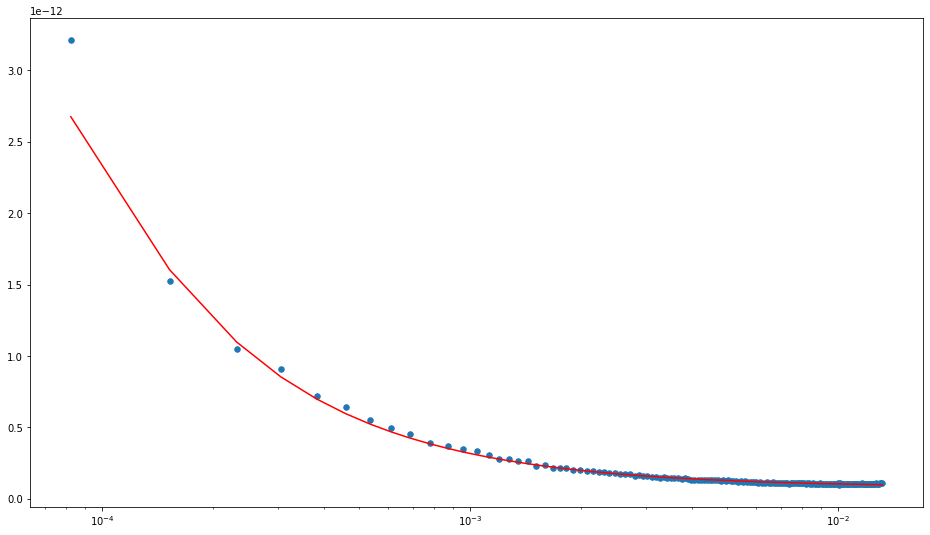

In [29]:
import matplotlib.pyplot as plt

idxs = aaa._adc_analysis_results['fit_indices']
hop_params = aaa._adc_analysis_results['fit_results']['ModelHop']['params']

fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(aaa._tn[idxs],aaa._adc[idxs],s = 30)
ax.semilogx(aaa._tn[idxs],ModelDB().models[0](aaa._tn[idxs],*hop_params),c = 'red')

In [28]:
ModelDB().models

In [23]:
ModelDB.models[0](aaa._tn[idxs],*hop_params)

IndexError: list index out of range